# DATA EXPLORATION

## Importing necessary packages

We import different packages that can be usefull for the exploration of the Data, because they give us the ability to visulaize and plot the Data in a clear und easy way.

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as seab
import sklearn as skl
from sqlalchemy import create_engine

## Loading the Data from database

First we build up a connection to the 'data.sqlite' Database in which the Pipeline loads the Data from the sources.

Then we store the Data from the 5 tables in 5 Variables, so that we can work with them later.
The 5 Tables and so the Variables are:
- df1 : Bewohneranzahl_SH_LandKreise
- df2 : Schueleranzahl_SH_21_22
- df3 : Covid_Faelle_nach_Schultypen
- df4 : Impfungen_SH
- df5 : Impfungen_SH_LandKreise
- df6 : Covid_Faelle_an_Schulen_nach_Landkreisen

In [18]:
db_connection = create_engine('sqlite:///../data/data.sqlite')

table_names = ['Bewohneranzahl_SH_LandKreise', 'Schueleranzahl_SH_21_22', 'Covid_Faelle_nach_Schultypen', 'Impfungen_SH', 'Impfungen_SH_LandKreise', 'Covid_Faelle_an_Schulen_nach_Landkreisen']

df1 = pd.read_sql_table(table_names[0], db_connection, index_col='Schlüssel-nummer')
df2 = pd.read_sql_table(table_names[1], db_connection, index_col='Schulart')
df3 = pd.read_sql_table(table_names[2], db_connection, index_col='Datum')
df4 = pd.read_sql_table(table_names[3], db_connection, index_col='Impfdatum')
df5 = pd.read_sql_table(table_names[4], db_connection, index_col='Impfdatum')
df6 = pd.read_sql_table(table_names[5], db_connection, index_col='Datum')

## Exploring

### Dataframe 1: Number of People Living in Schleswig Holstein (devided by counties)

In [19]:
df1.head(10)

,Kreis / Landkreis,insgesamt,männlich,weiblich,je km2
Schlüssel-nummer,,,,,
1001,"Flensburg, Stadt",92550,45874,46676,1631
1002,"Kiel, Landeshauptstadt",247717,120149,127568,2088
1003,"Lübeck, Hansestadt",218095,104723,113372,1018
1004,"Neumünster, Stadt",79502,39256,40246,1109
1051,Dithmarschen,135252,66561,68691,95
1053,Herzogtum Lauenburg,203712,99689,104023,161
1054,Nordfriesland,169043,82669,86374,81
1055,Ostholstein,203606,97822,105784,146
1056,Pinneberg,322130,157663,164467,485


### Dataframe 2: Number of pupil in Schleswig-Holstein in 2021/2022 (devided by Schooltypes)

In [20]:
df2.head(10)

,Schueler_innen_Anzahl
Schulart,
Insgesamt,292159
Grundschulen,105998
Gymnasien,75328
Integrierte Gesamtschulen,99763
Freie Waldorfschulen,4743
Förderschulen,6065
Abendgymnasien,262


Namen der Schulen ändern sodass sie zu denen in df3 passen:

In [21]:
# Mapping für die Änderung der Schularten
school_type_mapping = {
    'Insgesamt': 'Insgesamt',
    'Grundschulen': 'Grundschule',
    'Gymnasien': 'Gymnasium',
    'Integrierte Gesamtschulen': 'Gemeinschaftsschule',
    'Freie Waldorfschulen': 'Waldorfschule',
    'Förderschulen': 'Förderzentrum',
    'Abendgymnasien': 'Abendgymnasium'
}

# Anwendung des Mappings auf die Schularten in df2
df2.index = df2.index.map(school_type_mapping)

# Anzeige der aktualisierten Daten
df2.head(10)


,Schueler_innen_Anzahl
Schulart,
Insgesamt,292159
Grundschule,105998
Gymnasium,75328
Gemeinschaftsschule,99763
Waldorfschule,4743
Förderzentrum,6065
Abendgymnasium,262


### Dataframe 3: Covid Cases by School Types in Schleswig-Holstein

In [22]:
df3.head(10)

,Schulart,Anzahl
Datum,,
2022-03-01,Grundschule,240
2022-03-01,Förderzentrum,7
2022-03-01,Gemeinschaftsschule,162
2022-03-01,Waldorfschule,9
2022-03-01,Gymnasium,111
2022-03-01,Abendgymnasium,0
2022-03-01,Berufsbildende Schule,24
2022-02-28,Grundschule,303
2022-02-28,Förderzentrum,14


### Dataframe 4: Number of Covid-19 Vacinations in SH

In [23]:
df4.head(10)

,Anzahl
Impfdatum,
2020-12-27,808
2020-12-28,876
2020-12-29,2313
2020-12-30,1759
2020-12-31,1835
2021-01-01,688
2021-01-02,1199
2021-01-03,621
2021-01-04,3516


### Dataframe 5: Number of Covid-19 Vacinations in SH (divided by counties)

In [24]:
df5.head(10)

,LandkreisId_Impfort,Altersgruppe,Anzahl
Impfdatum,,,
2021-01-15,01055,12-17,5
2021-01-18,01053,12-17,5
2021-01-20,01002,12-17,6
2021-01-22,01051,12-17,5
2021-01-22,01060,12-17,5
2021-01-25,01003,12-17,5
2021-01-25,01054,12-17,5
2021-01-25,01057,12-17,7
2021-02-01,01059,12-17,7


# Mixed and Combined

## Question 1

We combine the Number of Covid Cases with the total number of Pupil in School Year 2021/22.

So we get the proportion of students that are sick at that moment.

In [45]:
# Mergen der beiden DataFrames basierend auf der Schulart und dem Datum
merged_df = pd.merge(df2, df3, left_index=True, right_on='Schulart')

# Berechnung des prozentualen Anteils an Covid-Fällen
merged_df['Positive Tests (%)'] = (merged_df['Anzahl'] / merged_df['Schueler_innen_Anzahl']) * 100

# Umbenennung der Spalten
merged_df.rename(columns={'Schueler_innen_Anzahl': 'Schueleranzahl', 'Anzahl': 'Positive Tests'}, inplace=True)

# Nach dem Zusammenführen wieder nach Datum sortieren
merged_df.sort_values(by='Datum', inplace=True)

# Anzahl aller aktuel Kranker Schüler nach Schulart berechnen (Annahme einer Krankheitsdauer von 14 Tagen)
merged_df['Kranke Schüler (%)'] = merged_df.groupby('Schulart')['Positive Tests (%)'].transform(lambda x: x.rolling(window=14, min_periods=1).sum())

# Anzeigen der ersten 10 Zeilen
merged_df.head(10)


,Schueleranzahl,Schulart,Positive Tests,Positive Tests (%),Kranke Schüler (%)
Datum,,,,,
2020-08-10,99763,Gemeinschaftsschule,0,0.000000,0.000000
2020-08-10,6065,Förderzentrum,0,0.000000,0.000000
2020-08-10,4743,Waldorfschule,0,0.000000,0.000000
2020-08-10,75328,Gymnasium,0,0.000000,0.000000
2020-08-10,105998,Grundschule,1,0.000943,0.000943
2020-08-10,262,Abendgymnasium,0,0.000000,0.000000
2020-08-11,262,Abendgymnasium,0,0.000000,0.000000
2020-08-11,75328,Gymnasium,0,0.000000,0.000000
2020-08-11,99763,Gemeinschaftsschule,0,0.000000,0.000000


 Now we visualize it (School year was from 02.08.2021 till 01.07.2022).

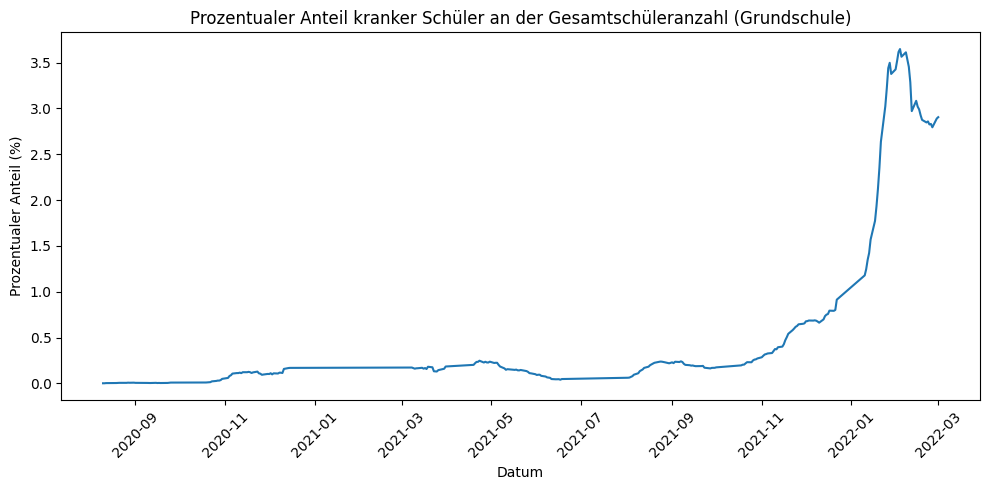

In [49]:
# Filtern nach 'Grundschule'
grundschule_data = merged_df[merged_df['Schulart'] == 'Grundschule']

# Erstellung des Zeitstrahls
plt.figure(figsize=(10, 5))
seab.lineplot(grundschule_data, x='Datum', y='Kranke Schüler (%)')
plt.title('Prozentualer Anteil kranker Schüler an der Gesamtschüleranzahl (Grundschule)')
plt.xlabel('Datum')
plt.ylabel('Prozentualer Anteil (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


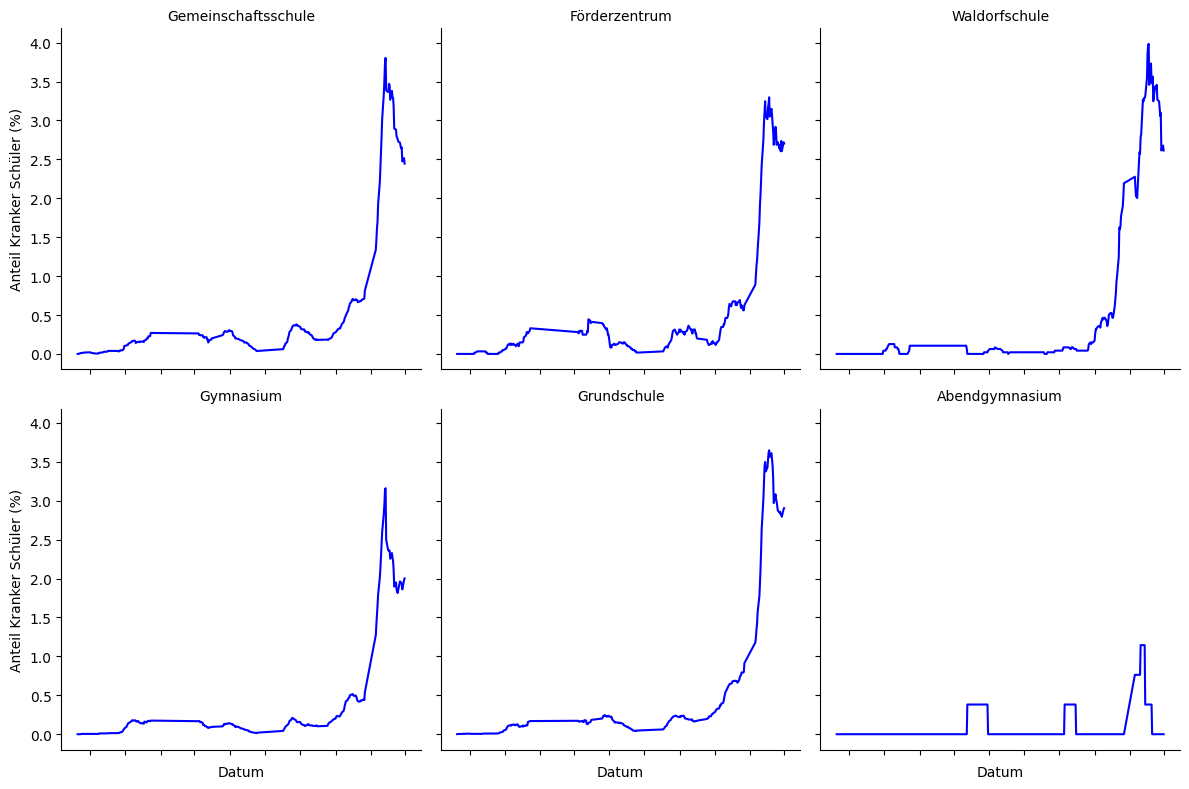

In [47]:
# Erstellung des Zeitstrahls für jeden Schultypen
g = seab.FacetGrid(merged_df, col='Schulart', col_wrap=3, height=4)
g.map_dataframe(seab.lineplot, x='Datum', y='Kranke Schüler (%)', color='blue')
g.set_axis_labels('Datum', 'Anteil Kranker Schüler (%)')
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()


Now that we have the proportion of sick pupil over the school year, we now merge it with the vaccination count.

So that we can see wich school type is mostly influenced by vaccinations.

## Question 2